In [1]:
# -*-coding:utf8-*-
import pandas as pd
import sklearn, time
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [2]:
# Multinomial Naive Bayes Classifier

def naive_bayes(x_train, y_train):
    from sklearn.naive_bayes import MultinomialNB
    model = MultinomialNB(alpha=0.01)
    model.fit(x_train, y_train)
    return model
# KNN classifier

def knn(x_train, y_train):
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier()
    model.fit(x_train, y_train)
    return model

# logistic Regression classifier
def logistic_regression(x_train, y_train):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(penalty = 'l2')
    model.fit(x_train, y_train)
    return model

# Random Forest Classifier    
def random_forest(x_train, y_train):    
    from sklearn.ensemble import RandomForestClassifier    
    model = RandomForestClassifier(n_estimators=8)    
    model.fit(x_train, y_train)    
    return model 

# Decision Tree Classifier    
def decision_tree(x_train, y_train):    
    from sklearn import tree    
    model = tree.DecisionTreeClassifier()    
    model.fit(x_train, y_train)    
    return model    
    
    
# GBDT(Gradient Boosting Decision Tree) Classifier    
def gradient_boosting(x_train, y_train):    
    from sklearn.ensemble import GradientBoostingClassifier    
    model = GradientBoostingClassifier(n_estimators=200)    
    model.fit(x_train, y_train)    
    return model    
    
    
# SVM Classifier    
def svm(x_train, y_train):    
    from sklearn.svm import SVC    
    model = SVC(kernel='rbf', probability=True)    
    model.fit(x_train, y_train)    
    return model   

# NN classifier
def neural_network(x_train, y_train):
    from sklearn.neural_network import MLPClassifier
    model = MLPClassifier(solver='lbfgs',alpha=1e-5, hidden_layer_sizes=(5,3),random_state=1)
#     model = MLPClassifier(solver='sgd', activation='relu',alpha=1e-4,hidden_layer_sizes=(50,50), random_state=1,max_iter=10,verbose=10,learning_rate_init=.1)
    model.fit(x_train, y_train)
    return model

In [3]:
# df = pd.read_csv('/home/wilson/Desktop/databases/db_labelled.csv')
df = pd.read_csv('/home/wilson/Desktop/databases/db_labelled.csv')
df.drop(['user_nickname','content','signature'],axis=1,inplace=True)

In [4]:
# handling NaN data in the database
np.isnan(df['LABEL']).any()

False

In [5]:
# df[df['LABEL'].isnull()]

In [6]:
# df.dropna(subset=['LABEL'],inplace=True)

In [7]:
df_y = df['LABEL']
# check the correlation between x and y
corr_matrix = df.corr()
corr_matrix['LABEL'].sort_values(ascending=False)

LABEL           1.000000
name_status     0.305579
ads_status      0.233026
phone_status    0.152416
name_phone      0.141382
count_en        0.049052
num_words       0.025633
count_sp        0.021497
kind_words      0.020175
count_pu       -0.011326
count_dg       -0.092567
count_zh       -0.158515
Name: LABEL, dtype: float64

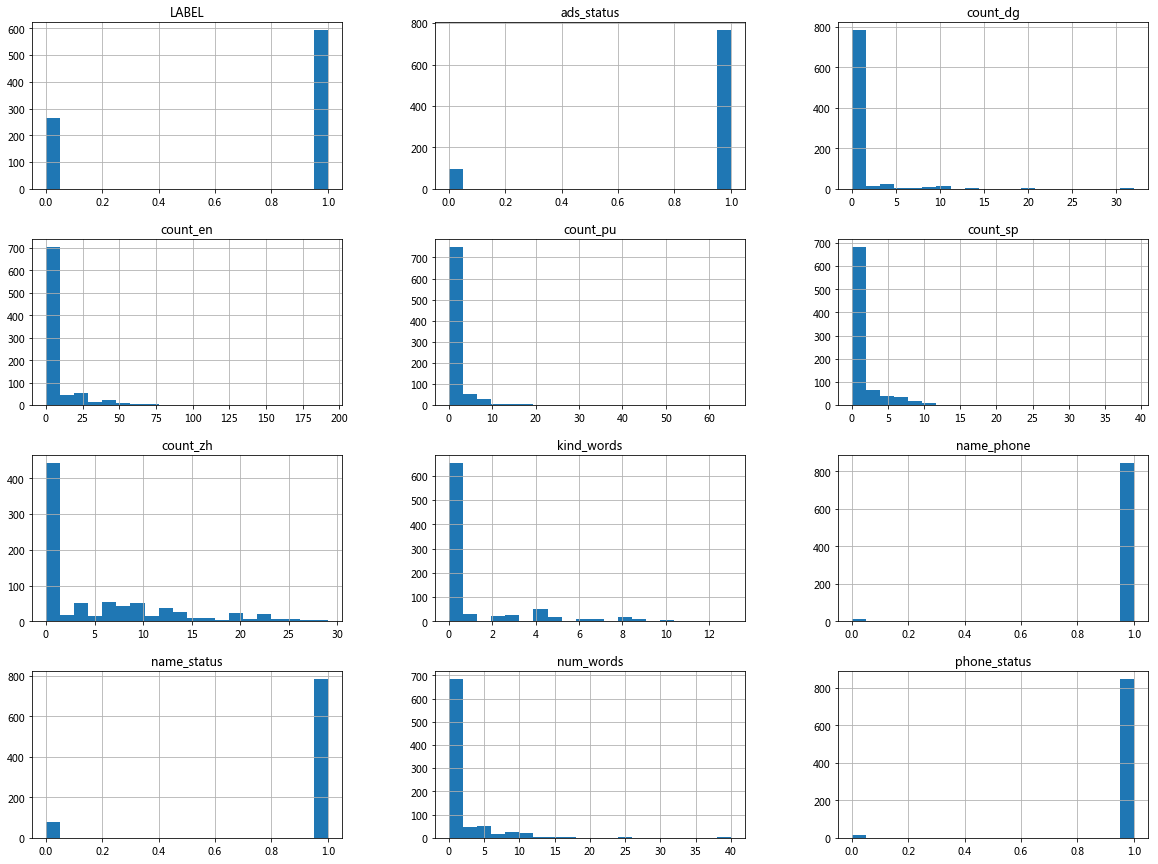

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=20, figsize=(20,15))
plt.show()

In [9]:
# df['count_dg'].where(df['count_dg']<15, inplace=True)
# df['count_dg'].hist(bins=20, figsize=(20,10))
# plt.show()

In [10]:
# corr_matrix = df.corr()
# corr_matrix['LABEL'].sort_values(ascending=False)

In [11]:
# df['num_words'].where(df['num_words']<20, inplace=True)
# # df['count_dg'].hist(bins=20, figsize=(20,10))
# # plt.show()
# corr_matrix = df.corr()
# corr_matrix['LABEL'].sort_values(ascending=False)

In [12]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
x_train = train_set.drop(['count_pu','count_dg','count_zh','LABEL'],axis=1)
y_train = train_set['LABEL'].copy()
# x_train.describe()

In [14]:
x_test = test_set.drop(['count_pu','count_dg','count_zh','LABEL'],axis=1)
y_test = test_set['LABEL'].copy()

In [15]:
classifiers_list =['NB','KNN','LR','RF','DT','SVM','GBDT', 'NN']
classifiers = {'NB':naive_bayes,     
              'KNN':knn,    
               'LR':logistic_regression,    
               'RF':random_forest,    
               'DT':decision_tree,    
              'SVM':svm,    
             'GBDT':gradient_boosting,   
               'NN':neural_network,
} 

In [16]:
for classifier in classifiers_list:
    start_time = time.time()
    print("=============%s=============="%classifier)
    model = classifiers[classifier](x_train, y_train)
    end_time = time.time()
    print("training time is: %s"%(end_time-start_time))
    predict= model.predict(x_test)
    precision = metrics.precision_score(y_test, predict)
    print('precision is %s' % precision)
    recall = metrics.recall_score(y_test, predict)
    accuracy = metrics.accuracy_score(y_test, predict)
    print('accuracy is: %s' % accuracy)
#     print("Probability distributing: %s"%model.predict_proba(x_test))

=============NB==============
training time is: 0.004610300064086914
precision is 0.7017543859649122
accuracy is: 0.6976744186046512
=============KNN==============
training time is: 0.15656781196594238
precision is 0.74
accuracy is: 0.7151162790697675
=============LR==============
training time is: 0.14004755020141602
precision is 0.7597402597402597
accuracy is: 0.7616279069767442
=============RF==============
training time is: 0.02458024024963379
precision is 0.7551020408163265
accuracy is: 0.7325581395348837
=============DT==============
training time is: 0.0016033649444580078
precision is 0.7602739726027398
accuracy is: 0.7383720930232558
=============SVM==============
training time is: 0.06067395210266113
precision is 0.7515923566878981
accuracy is: 0.7558139534883721
=============GBDT==============
training time is: 0.14329051971435547
precision is 0.7534246575342466
accuracy is: 0.7267441860465116
=============NN==============
training time is: 0.10554146766662598
precision is 0.